<a href="https://colab.research.google.com/github/lauraosede/Mullti-task-Tweet-Classification-Using-BERT-Model/blob/Datasets/%5CcolabCode%5CMulti_task_Tweet_Classification_Using_BERTModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1) Import Libraries



In [8]:
!pip install transformers


#imports 
import os
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations. Pandas is built on Numpy
import csv # to read and write csv files
import re # In-built regular expressions library
import string # Inbuilt string library
import glob # to retrieve files/pathnames matching a specified pattern. 
import random # generating random numbers
import requests # to send HTTP requests
from PIL import Image # for opening, manipulating, and saving many different image file f
import matplotlib.pyplot as plt # for plotting
import nltk
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from transformers import BertTokenizer, BertModel, BertConfig,  BertForPreTraining
import torch
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
from scipy.special import softmax
import urllib.request

# Natural Language Processing Toolkit
from nltk.corpus import stopwords, words # get stopwords from NLTK library & get all words in english language
from nltk.tokenize import word_tokenize # to create word tokens
# from nltk.stem import PorterStemmer (I played around with Stemmer and decided to use Lemmatizer instead)
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk import pos_tag # For Parts of Speech tagging

from textblob import TextBlob # TextBlob - Python library for processing textual data



# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

!pip install emot
from emot.emo_unicode import UNICODE_EMO, EMOTICONS # For emojis

def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


##2) Data Cleaning and Preparation for EDA


Before performing exploratory data analysis, we need to clean and prepare our data as much as possible. Tasks here will include;
*   Examining our data
*   Removing null values or performing imputation from our dataset
*   Expand contractions
*   Lowercase the tweets
*   Remove punctuations
*   Lemmatize tweet - reduces the inflectional forms of each word into a common base or root.






#####Defining functions

In [9]:
#function reads two txt files, converts it to dataframe and returns dataframe
def read_file(filename1, filename2): 
    train_line = []
    train_label = []

    #opening text file
    with open(filename1, 'r') as reader:
        lines = reader.readlines()
        for line in lines:
            train_line.append(line.rstrip())
    
    #opening train file 
    with open(filename2, 'r') as reader:
      label_lines = reader.readlines()
      for line in label_lines:
        train_label.append(line.rstrip())
    

    #convert text file to data frame
    df = pd.DataFrame()
    df['text'] = train_line
    df['Mapping'] = train_label
    return df


In [10]:
#function removes '@',  http links, punctuations, emojis, and stop words from data
def preprocess(tweet): 
    tweet = tweet.lower()  #has to be in place
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
    
    # convert string to tokens
    PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
    tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
    tokens = tokenizer.tokenize(tweet) 

    # Remove stopwords
    filtered_words = [w for w in tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w not in emojis]
    filtered_words = [w for w in filtered_words if w in word_list]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them

In [11]:
# function to return words to their base form using Lemmatizer
def preprocessTweetsSentiments(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

    


In [12]:
# function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [13]:
# Defining my NLTK stop words
stop_words = list(stopwords.words('english'))
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + alphabets
word_list = words.words()  # all words in English language
emojis = list(UNICODE_EMO.keys())  # full list of emojis

#####Exploring emotion dataset

In [14]:
emotion_train = read_file('/content/drive/MyDrive/datasets/emotions/train_text.txt','/content/drive/MyDrive/datasets/emotions/train_labels.txt' )

Examining our data

In [15]:
emotion_train.head(10)

,text,Mapping
0,“Worry is a down payment on a problem you may ...,2
1,My roommate: it's okay that we can't spell bec...,0
2,No but that's so cute. Atsu was probably shy a...,1
3,Rooneys fucking untouchable isn't he? Been fuc...,0
4,it's pretty depressing when u hit pan on ur fa...,3
5,@user but your pussy was weak from what I hear...,0
6,Making that yearly transition from excited and...,3
7,Tiller and breezy should do a collab album. Ra...,1
8,@user broadband is shocking regretting signing...,0
9,@user Look at those teef! #growl,0


In [16]:
emotion_train.describe()

,text,Mapping
count,3257,3257
unique,3232,4
top,Watch this amazing live.ly broadcast by @user ...,0
freq,15,1400


In [17]:
emotion_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3257 entries, 0 to 3256
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     3257 non-null   object
 1   Mapping  3257 non-null   object
dtypes: object(2)
memory usage: 51.0+ KB


We want to examin the tweets indept, so we print the first 40 tweets out.

In [18]:
for index,text in enumerate(emotion_train['text'][0:40]): 
  print((index+1),text)

1 “Worry is a down payment on a problem you may never have'.  Joyce Meyer.  #motivation #leadership #worry
2 My roommate: it's okay that we can't spell because we have autocorrect. #terrible #firstworldprobs
3 No but that's so cute. Atsu was probably shy about photos before but cherry helped her out uwu
4 Rooneys fucking untouchable isn't he? Been fucking dreadful again, depay has looked decent(ish)tonight
5 it's pretty depressing when u hit pan on ur favourite highlighter
6 @user but your pussy was weak from what I heard so stfu up to me bitch . You got to threaten him that your pregnant .
7 Making that yearly transition from excited and hopeful college returner to sick and exhausted pessimist. #college
8 Tiller and breezy should do a collab album. Rapping and singing prolly be fire
9 @user broadband is shocking regretting signing up now #angry #shouldofgonewithvirgin
10 @user Look at those teef! #growl
11 @user @user USA was embarrassing to watch. When was the last time you guys won 

From this data, it is obvious that there are contractions, emoticons, hashtags, puntuation marks like; '',*, @ \n , !,etc. we will use our functions created to clean the data a little so as to achieve better accuracy


In [19]:
# Apply preprocess function to the 'text' column to generate a new column called 'Processed text'.
emotion_train['Processed_Text'] = emotion_train['text'].apply(preprocess)

In [20]:
# Apply getAdjectives function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Adjectives'
emotion_train['Text_Adjectives'] = emotion_train['Processed_Text'].apply(getAdjectives)

In [21]:
# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
# called 'Processed_Tweets'
emotion_train['Text_Sentiments'] = emotion_train['Processed_Text'].apply(preprocessTweetsSentiments)

In [22]:
emotion_train.head(40)

,text,Mapping,Processed_Text,Text_Adjectives,Text_Sentiments
0,“Worry is a down payment on a problem you may ...,2,worry payment problem may never joy motivation...,worry,worry payment problem may never joy motivation...
1,My roommate: it's okay that we can't spell bec...,0,roommate spell auto terrible first,terrible first,roommate spell auto terrible first
2,No but that's so cute. Atsu was probably shy a...,1,cute probably shy cherry,shy,cute probably shy cherry
3,Rooneys fucking untouchable isn't he? Been fuc...,0,unto dreadful de decent tonight,unto,unto dreadful de decent tonight
4,it's pretty depressing when u hit pan on ur fa...,3,pretty de hit pan highlight,,pretty de hit pan highlight
5,@user but your pussy was weak from what I hear...,0,pu weak bitch got threaten pregnant,weak threaten pregnant,pu weak bitch got threaten pregnant
6,Making that yearly transition from excited and...,3,making yearly transition excited hopeful colle...,yearly hopeful sick,making yearly transition excited hopeful colle...
7,Tiller and breezy should do a collab album. Ra...,1,till album rap singing pro fire,pro,till album rap singing pro fire
8,@user broadband is shocking regretting signing...,0,shocking regret angry,angry,shocking regret angry
9,@user Look at those teef! #growl,0,look tee growl,,look tee growl


In [24]:
#printing results for better analysis
print(emotion_train['text'][19])
print(emotion_train['Processed_Text'][19])
print(emotion_train['Text_Sentiments'][19])

@user @user @user Tamra would F her up if she swung on Tamra\nKelly is a piece of 💩 #needstobeadmitted #bully
ta would swung ta piece needs bull
ta would swung ta piece need bull


#####Exploring irony dataset

In [25]:
irony_train = read_file('/content/drive/MyDrive/datasets/irony/train_text.txt', '/content/drive/MyDrive/datasets/irony/train_labels.txt')

In [26]:
irony_train.head()

,text,Mapping
0,seeing ppl walking w/ crutches makes me really...,1
1,"look for the girl with the broken smile, ask h...",0
2,Now I remember why I buy books online @user #s...,1
3,@user @user So is he banded from wearing the c...,1
4,Just found out there are Etch A Sketch apps. ...,1


In [27]:
irony_train.describe()

,text,Mapping
count,2862,2862
unique,2862,2
top,8.30am conference calls.|#love,1
freq,1,1445


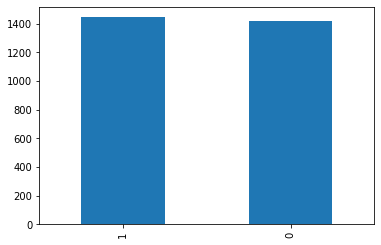

In [28]:
irony_train['Mapping'].value_counts().plot(kind='bar')

Repeating the preprocessing steps I took earlier

In [29]:
# Apply preprocess function to the 'text' column to generate a new column called 'Processed text'.
irony_train['Processed_Text'] = irony_train['text'].apply(preprocess)

In [33]:
# Apply getAdjectives function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Adjectives'
irony_train['Text_Adjectives'] = irony_train['Processed_Text'].apply(getAdjectives)

In [34]:
# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
# called 'Processed_Tweets'
irony_train['Text_Sentiments'] = irony_train['Processed_Text'].apply(preprocessTweetsSentiments)

In [32]:
#printing results for better analysis
print(irony_train['text'][19])
print(irony_train['Processed_Text'][19])
print(irony_train['Text_Sentiments'][19])

Main issue with the walking dead- you forget to breathe when you're watching. So bloody good #WalkingDead
main issue walking dead forget breathe watching bloody good walking
main issue walking dead forget breathe watching bloody good walking


#####Exploring sentiment dataset

In [35]:
sentiment_train = read_file('/content/drive/MyDrive/datasets/sentiment/train_text.txt','/content/drive/MyDrive/datasets/sentiment/train_labels.txt')

In [36]:
sentiment_train.head()

,text,Mapping
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


In [37]:
sentiment_train.describe()

,text,Mapping
count,45615,45615
unique,45586,3
top,Cycling Mission with Passion Team #Ride2Light ...,1
freq,3,20673


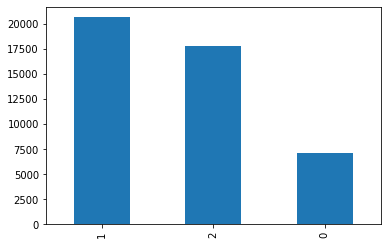

In [38]:
sentiment_train['Mapping'].value_counts().plot(kind='bar')

Repeating the preprocessing steps I took earlier

In [ ]:
# Apply preprocess function to the 'text' column to generate a new column called 'Processed text'.
sentiment_train['Processed_Text'] = sentiment_train['text'].apply(preprocess)

In [ ]:
# Apply getAdjectives function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Adjectives'
sentiment_train['Text_Adjectives'] = sentiment_train['Processed_Text'].apply(getAdjectives)

In [ ]:
# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
# called 'Processed_Tweets'
sentiment_train['Text_Sentiments'] = sentiment_train['Processed_Text'].apply(preprocessTweetsSentiments)

In [ ]:
#printing results for better analysis
print(sentiment_train['text'][19])
print(sentiment_train['Processed_Text'][19])
print(sentiment_train['Text_Sentiments'][19])

##3) Exploratory Data Analysis


Here, we will explore our data. To do this, we will identify the most common words in each classification task. In this section, we will; 
*   Identify the most common words in our data
*   Perform sentiment analysis
word frequency analysis,
sentence length analysis,
average word length analysis,
*   Target Distribution
*   List item





#####Defining functions

In [ ]:
#Function gets the most common words and displays them
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()



In [ ]:
show_wordcloud(emotion_train[Processed_Text])

In [ ]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = emotion_train['Tweets_Adjectives'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [ ]:
# Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

In [ ]:
# Import Twitter Logo
image = np.array(Image.open('/content/twitter_PNG1.png'))
    
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

#plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

In [ ]:
# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

######EDA on emotion dataset

In [ ]:
emotion_train.info()

Great, no missing values in the  texts! Do we have class imbalance?

In [ ]:
emotion_train['Mapping'].value_counts().plot(kind='bar')

This plot shows a huge imbalance with the most tweet showing angry emotions, and very few data on optimisim. We will have to work on balancing the dataset.

######EDA on irony dataset

In [ ]:
irony_train.info()

In [ ]:
#pie chart analysis of my data 
irony_train.groupby(['Mapping']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

######EDA on sentiment dataset

In [ ]:
sentiment_train.info()

In [ ]:
#pie chart analysis of my data 
sentiment_train.groupby(['Mapping']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

Let’s take a look at the inferences drawn from the above analysis:
From my analysis, we can see how the data stats. With wordcloud, we can see the most common words. 
We can also see that there are some imbalances in our emotion and sentiment dataset. This could cause some bias when training our model, so we will need to deal with them before training a model on them. 

We can delve further to find the most common words for each label of each task. 

####Reference

In [ ]:
# Citing TweetEval datasets

If you use any of the TweetEval datasets, please cite their original publications:

#### Emotion Recognition:
```
@inproceedings{mohammad2018semeval,
  title={Semeval-2018 task 1: Affect in tweets},
  author={Mohammad, Saif and Bravo-Marquez, Felipe and Salameh, Mohammad and Kiritchenko, Svetlana},
  booktitle={Proceedings of the 12th international workshop on semantic evaluation},
  pages={1--17},
  year={2018}
}

```

#### Irony Detection:
```
@inproceedings{van2018semeval,
  title={Semeval-2018 task 3: Irony detection in english tweets},
  author={Van Hee, Cynthia and Lefever, Els and Hoste, V{\'e}ronique},
  booktitle={Proceedings of The 12th International Workshop on Semantic Evaluation},
  pages={39--50},
  year={2018}
}
```


#### Sentiment Analysis:
```
@inproceedings{rosenthal2017semeval,
  title={SemEval-2017 task 4: Sentiment analysis in Twitter},
  author={Rosenthal, Sara and Farra, Noura and Nakov, Preslav},
  booktitle={Proceedings of the 11th international workshop on semantic evaluation (SemEval-2017)},
  pages={502--518},
  year={2017}
}
```

[Analyzing Twitter Users' Reflections using NLP](https://nbviewer.jupyter.org/github/jess-data/Twitter-2020-Sentiment-Analysis/blob/master/Twitter%20Sentiment%20Analysis%20Project.ipynb)

[Sentiment-analysis-with-bert](https://colab.research.google.com/drive/1PHv-IRLPCtv7oTcIGbsgZHqrB5LPvB7S#scrollTo=U3HZb3NWFtFf)

[A Beginner’s Guide to Exploratory Data Analysis (EDA) on Text Data (Amazon Case Study)](https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/)

[Exploratory Data Analysis for Natural Language Processing: A Complete Guide to Python Tools](https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools)